In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('adult.data' , 'r') as f2:
    data = f2.readlines()
#print(data[:100])

In [3]:
lst=[]
cnt=0
for d in data:
    k = d.split(', ')
    k[len(k)-1] = k[len(k)-1].replace("\n","")
    lst.append(k)

In [4]:
labels = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race' ,'sex','capital-gain','capital-loss','hours-per-week','native-country','Salary(<=50K or >50K)']

In [5]:
fd = pd.DataFrame(lst , columns = labels)

In [6]:
#fd = fd[~mask.any(axis=1)]
fd = fd.replace('?',np.nan)

In [7]:
def conv_func(value):
    if value=='<=50K':
        return True
    else:
        return False

In [8]:
fd['Salary<=50K'] = fd['Salary(<=50K or >50K)'].apply(conv_func)

In [9]:
Data_M50K = fd[fd['Salary<=50K']== False]
Data_LE50K = fd[fd['Salary<=50K']== True]

In [10]:
print(len(fd), len(Data_M50K) , len(Data_LE50K))

32562 7842 24720


In [11]:
from sklearn.utils import resample
und_data = resample(Data_LE50K , replace=False , n_samples =len(Data_M50K) , random_state=42)
fd_r = pd.concat([und_data , Data_M50K])

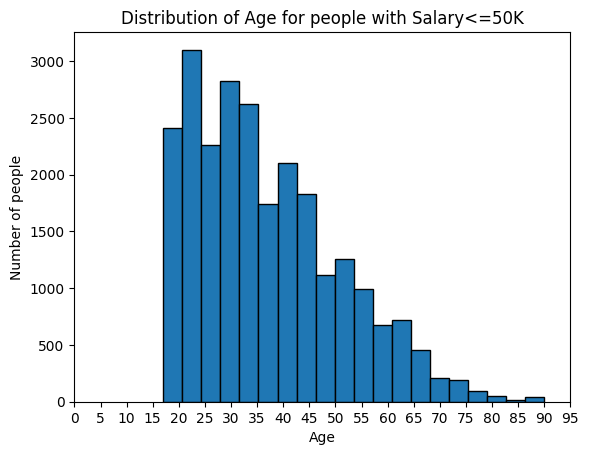

In [12]:
#User Story 1
#Age distribution of people making <=50K
clsf_age = Data_LE50K['age'].value_counts().to_dict()
values = list(clsf_age.values())
labels = list(map(int, clsf_age.keys()))
plt.hist(labels, weights=values, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Distribution of Age for people with Salary<=50K')
plt.xticks(range(0, 100, 5))
plt.show()

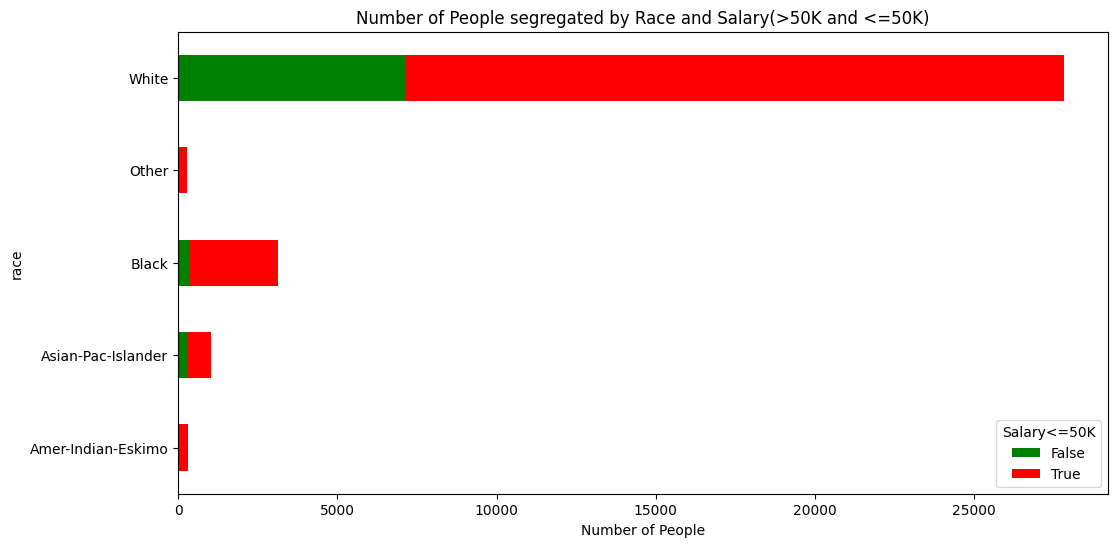

In [13]:
#User story 2 , when dataset balancing is done , we can see different proportions
U2_story = fd.groupby(['race', 'Salary<=50K'])['Salary<=50K'].count().unstack()
ax = U2_story.plot(kind='barh',stacked=True, figsize=(12,6) , color=['green','red'])
ax.set_xlabel('Number of People')
ax.set_title('Number of People segregated by Race and Salary(>50K and <=50K)')
plt.show()

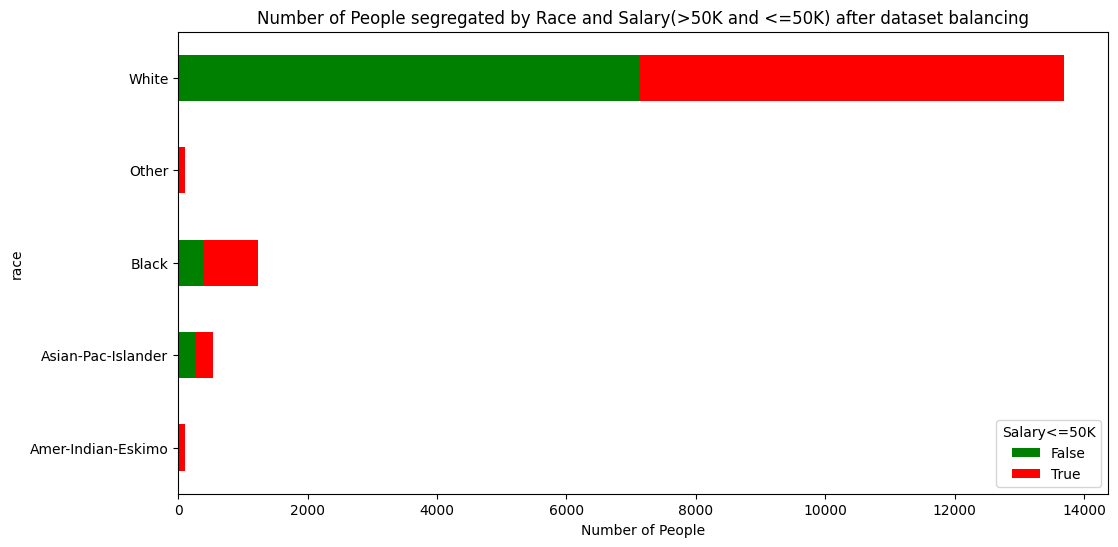

In [14]:
#User story 2 , when dataset balancing is done , we can see different proportions
U2_storyb = fd_r.groupby(['race', 'Salary<=50K'])['Salary<=50K'].count().unstack()
ax = U2_storyb.plot(kind='barh',stacked=True, figsize=(12,6) , color=['green','red'])
ax.set_xlabel('Number of People')
ax.set_title('Number of People segregated by Race and Salary(>50K and <=50K) after dataset balancing')
plt.show()

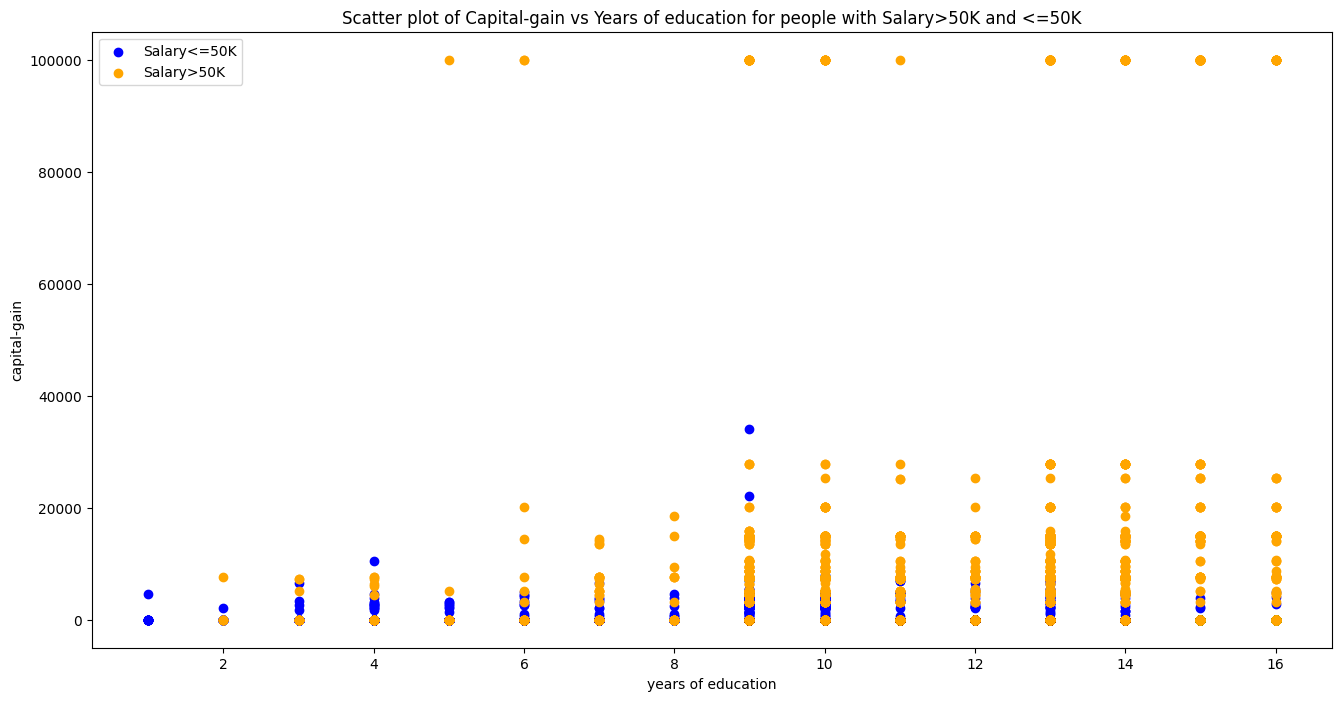

In [15]:
#U3 story - we depicted capital gain vs education-num for both classes of people with Salary more than and less than 50K
DM50K_r = fd_r[fd_r['Salary<=50K']== False]
DLE50K_r = fd_r[fd_r['Salary<=50K']== True]
#print(len(DM50K_r) , len(DLE50K_r))
DM50K_r = DM50K_r.dropna()
DLE50K_r = DLE50K_r.dropna()
#print(len(DM50K_r) , len(DLE50K_r))
DM50K_r['capital-gain'] = DM50K_r['capital-gain'].astype(int)
DLE50K_r['capital-gain'] = DLE50K_r['capital-gain'].astype(int)
DM50K_r['education-num'] = DM50K_r['education-num'].astype(int)
DLE50K_r['education-num'] = DLE50K_r['education-num'].astype(int)
plt.figure(figsize=(16,8))
plt.scatter(DLE50K_r['education-num'],DLE50K_r['capital-gain'],color='blue',label='Salary<=50K')
plt.scatter(DM50K_r['education-num'],DM50K_r['capital-gain'],color='orange',label='Salary>50K')
plt.xlabel('years of education')
plt.ylabel('capital-gain')
plt.title('Scatter plot of Capital-gain vs Years of education for people with Salary>50K and <=50K')
plt.legend()
plt.show()

In [16]:
#U4 story
import plotly.express as px
U4_data = fd_r[['marital-status','hours-per-week','education-num','Salary(<=50K or >50K)']].dropna(subset=['marital-status'])
U4_data.head()
U4_data['hours-per-week'] = U4_data['hours-per-week'].astype(int)
U4_data['education-num'] = U4_data['education-num'].astype(int)
g_d = U4_data.groupby(['marital-status', 'Salary(<=50K or >50K)']).agg({'education-num': 'mean', 'hours-per-week': 'mean','Salary(<=50K or >50K)':'count'}).unstack()
g_d.rename(columns={'Salary(<=50K or >50K)': 'count'}, inplace=True)

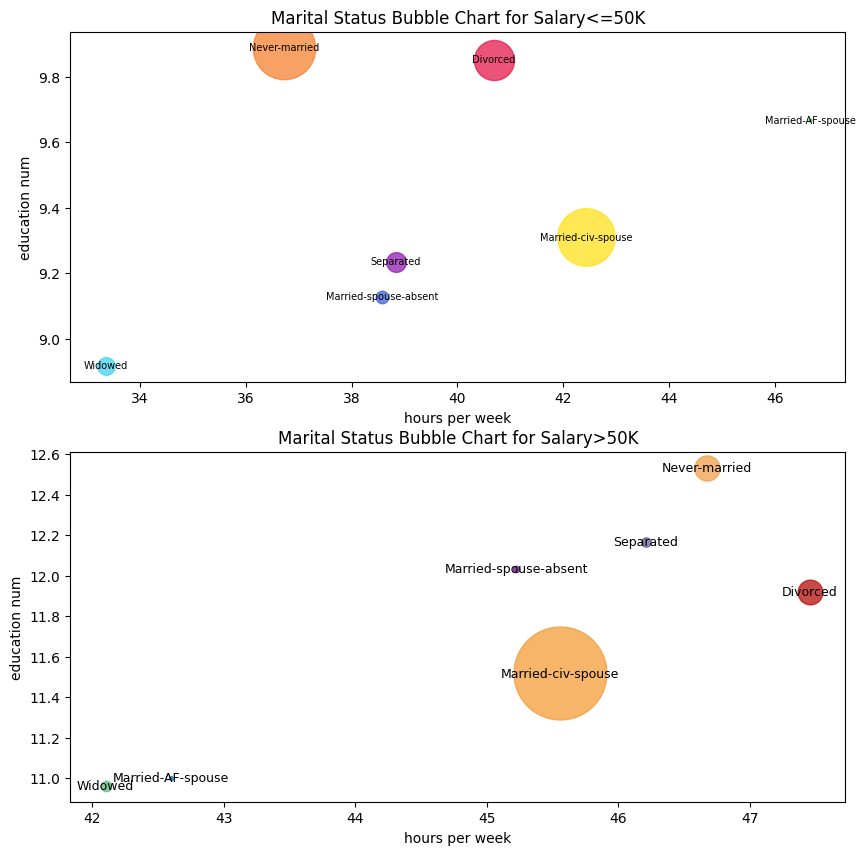

In [17]:
import seaborn as sns
U4_dt = DLE50K_r[['marital-status','hours-per-week','education-num']].dropna(subset=['marital-status'])
U4_dt['hours-per-week'] = U4_dt['hours-per-week'].astype(int)
U4_dt['education-num'] = U4_dt['education-num'].astype(int)

U4_dtm = DM50K_r[['marital-status','hours-per-week','education-num']].dropna(subset=['marital-status'])
U4_dtm['hours-per-week'] = U4_dtm['hours-per-week'].astype(int)
U4_dtm['education-num'] = U4_dtm['education-num'].astype(int)


g_d = U4_dt.groupby(['marital-status']).agg({'education-num': 'mean', 'hours-per-week': 'mean','marital-status':'count'})
#print(g_d['marital-status'])
g_d1 = U4_dtm.groupby(['marital-status']).agg({'education-num': 'mean', 'hours-per-week': 'mean','marital-status':'count'})

g_d.rename(columns={'marital-status': 'count'}, inplace=True)
g_d1.rename(columns={'marital-status': 'count'}, inplace=True)

#print(g_d,g_d1)
colors = {'Divorced': '#e6194B', 
          'Married-AF-spouse': '#3cb44b', 
          'Married-civ-spouse': '#ffe119', 
          'Married-spouse-absent': '#4363d8', 
          'Never-married': '#f58231', 
          'Separated': '#911eb4', 
          'Widowed': '#42d4f4'}
labels = list(colors.keys())
colors1 = {'Divorced': '#b80f0a', 
          'Married-AF-spouse': '#007cbe', 
          'Married-civ-spouse': '#f49d37', 
          'Married-spouse-absent': '#6b1b7f', 
          'Never-married': '#f0a14b', 
          'Separated': '#6e5f98', 
          'Widowed': '#5ebe7d'}
labels1 = list(colors1.keys())

fig, (ax,ax1) = plt.subplots(2,1,figsize=(10, 10))
for index , row in g_d.iterrows():
    ax.scatter(row['hours-per-week'],row['education-num']  , s=row['count']*0.7 ,color = colors[index] , alpha=.75 ,label=index)
    ax.text(row['hours-per-week'],row['education-num'] , index, ha='center', va='center', fontsize=7)
ax.set_xlabel('hours per week')
ax.set_ylabel('education num')
ax.set_title('Marital Status Bubble Chart for Salary<=50K')


for index1 , row1 in g_d1.iterrows():
    ax1.scatter(row1['hours-per-week'],row1['education-num']  , s=row1['count']*0.7 ,color = colors1[index1] , alpha=.75 ,label=index1)
    ax1.text(row1['hours-per-week'],row1['education-num'] , index1, ha='center', va='center', fontsize=9)
ax1.set_xlabel('hours per week')
ax1.set_ylabel('education num')
ax1.set_title('Marital Status Bubble Chart for Salary>50K')
#ax.legend(title='Marital Status', labels=labels)
plt.show()

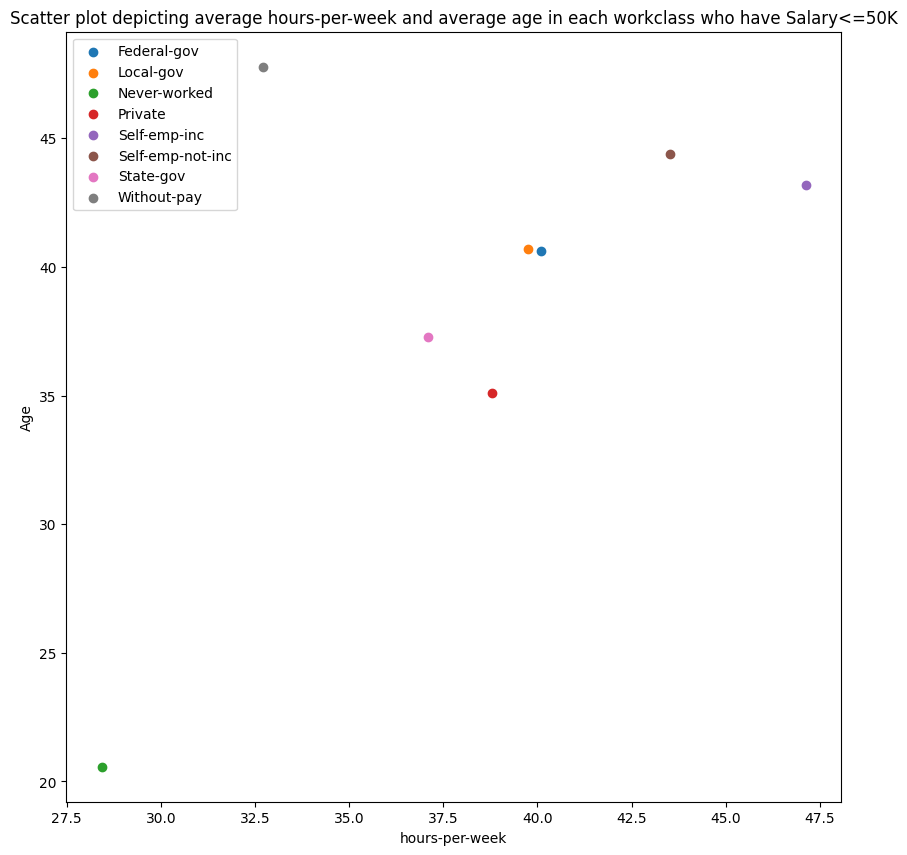

In [18]:
import seaborn as sns
U5_dt = Data_LE50K[['Salary(<=50K or >50K)' , 'workclass', 'hours-per-week','education-num','age']].copy()
#U5_dt = U5_dt.replace(np.nan,0)
U5_dt['hours-per-week'] = U5_dt['hours-per-week'].astype(int)
U5_dt['education-num'] = U5_dt['education-num'].astype(int)
U5_dt['age'] = U5_dt['age'].astype(int)
U5_dt = U5_dt.dropna(subset=['workclass'])
g_5d = U5_dt.groupby(['workclass']).agg({'Salary(<=50K or >50K)':'count','hours-per-week':'mean','age':'mean'})
g_5d.rename(columns={'Salary(<=50K or >50K)': 'count'}, inplace=True)
#print(g_d['marital-status'])
fig, bx = plt.subplots(figsize=(10, 10))
for indx , rw in g_5d.iterrows():
    bx.scatter(rw['hours-per-week'] , rw['age'] ,label =indx)
plt.legend()
plt.xlabel('hours-per-week')
plt.ylabel('Age')
plt.title('Scatter plot depicting average hours-per-week and average age in each workclass who have Salary<=50K')
plt.show()

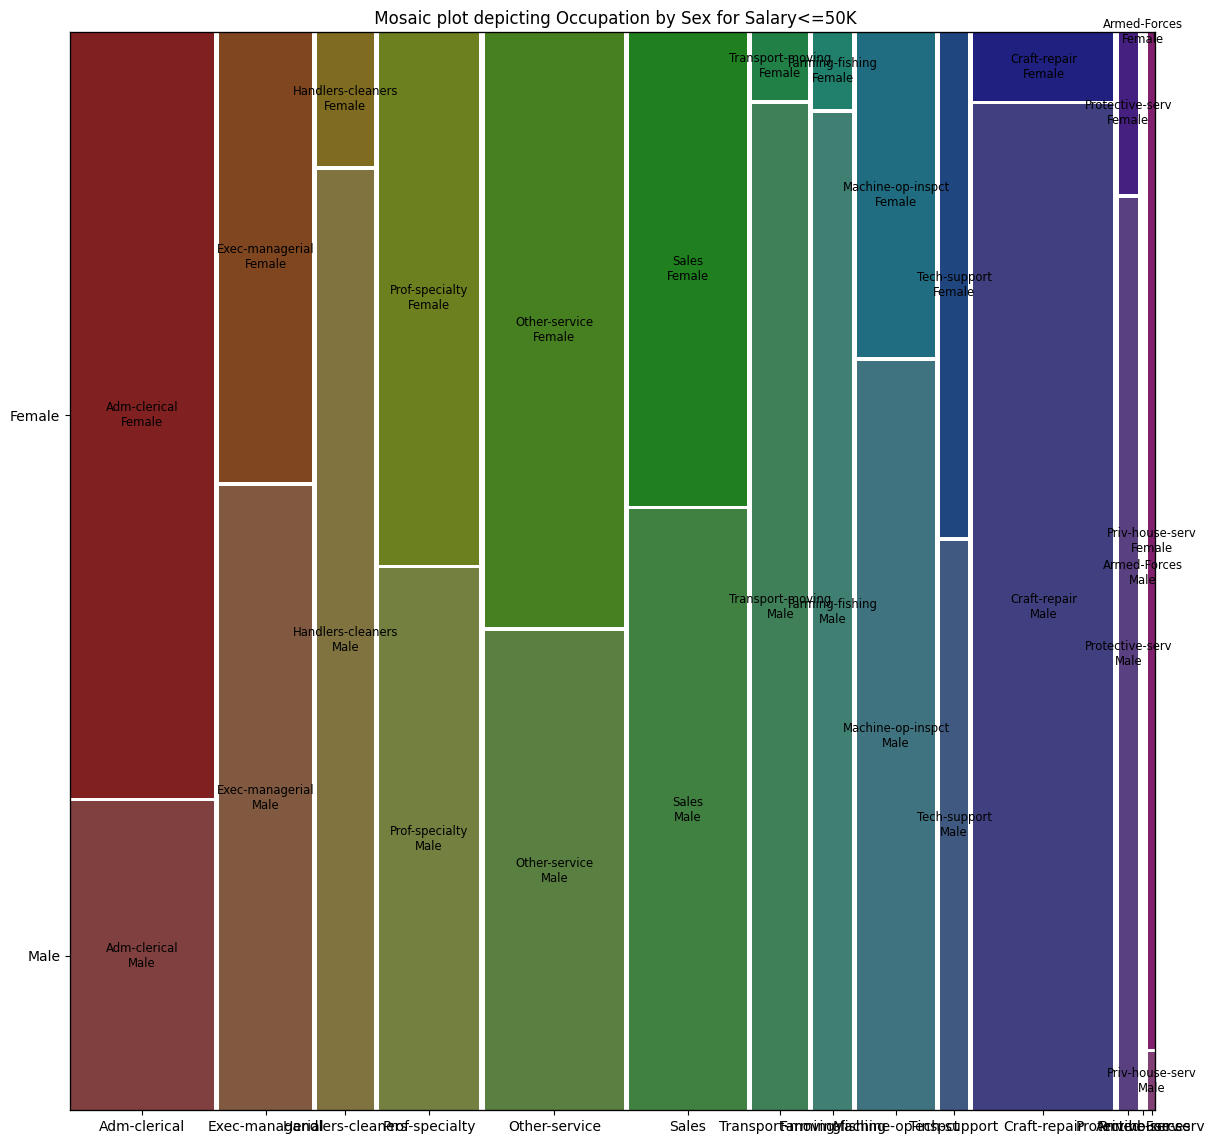

In [19]:
#User story 6
from statsmodels.graphics.mosaicplot import mosaic
fig, ax = plt.subplots(figsize=(14, 14))
mosaic(Data_LE50K, ['occupation', 'sex'], title=' Mosaic plot depicting Occupation by Sex for Salary<=50K', ax=ax)
plt.show()

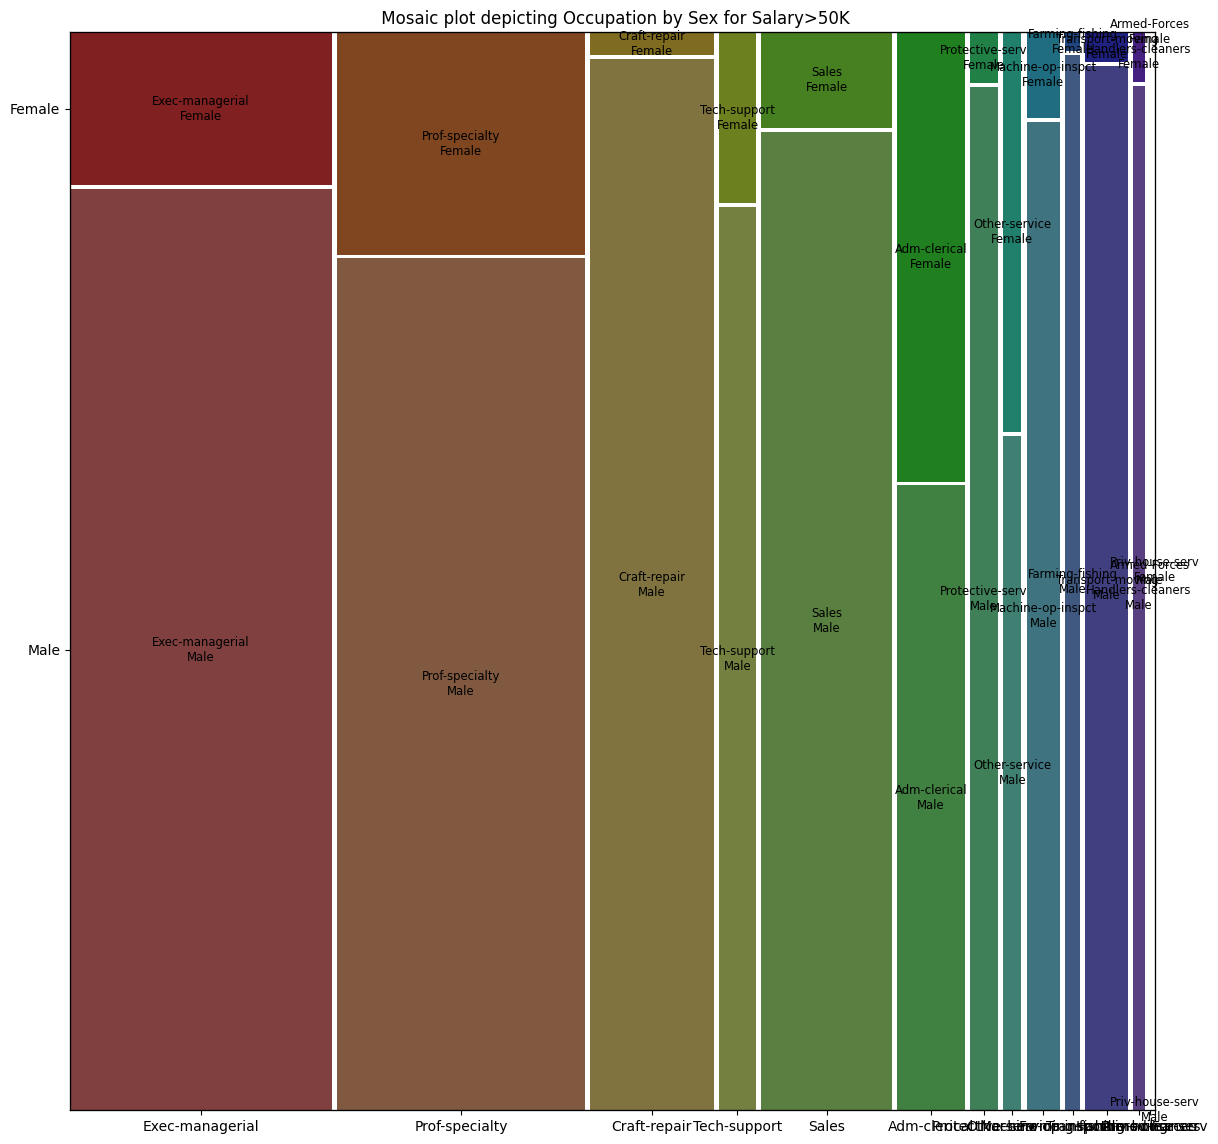

In [20]:
#User story 6 -continued
fig, ax = plt.subplots(figsize=(14, 14))
mosaic(Data_M50K, ['occupation', 'sex'], title=' Mosaic plot depicting Occupation by Sex for Salary>50K', ax=ax)
plt.show()

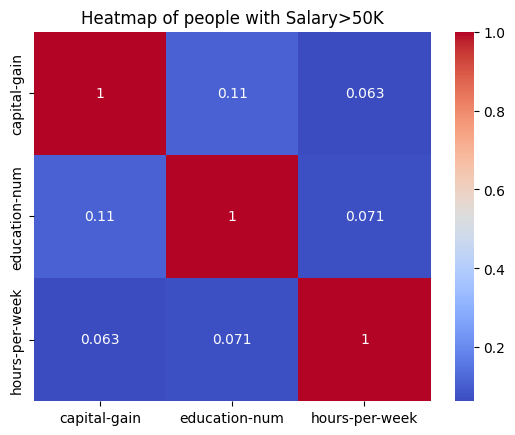

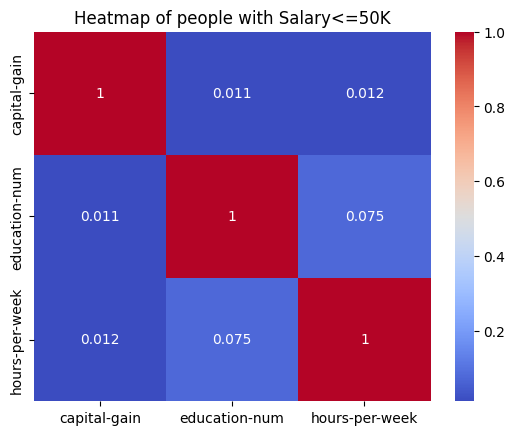

In [21]:
#User story 7
import seaborn as sns
DLE50K_r['hours-per-week'] = DLE50K_r['hours-per-week'].astype(int)
DM50K_r['hours-per-week'] = DM50K_r['hours-per-week'].astype(int)

sns.heatmap(DM50K_r[['capital-gain','education-num','hours-per-week']].corr() , annot=True , cmap='coolwarm')
plt.title('Heatmap of people with Salary>50K')
plt.show()
sns.heatmap(DLE50K_r[['capital-gain','education-num','hours-per-week']].corr() , annot=True , cmap='coolwarm')
plt.title('Heatmap of people with Salary<=50K')
plt.show()